<a href="https://colab.research.google.com/github/PomesHouse/SkillTreePython-DataAnalysis/blob/main/02.%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94/ch02_10_%EC%97%AC%EB%9F%AC%EA%B0%80%EC%A7%80_%EC%8B%9C%EA%B0%81%ED%99%94_%ED%94%8C%EB%A1%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.10. 여러가지 시각화 플롯
---

* 날짜:
* 이름:


In [3]:
#등치지도 
import folium


In [ ]:
m = folium.Map([37.466, 126.9780], 
               zoom_start = 12, tiles = 'Stamen Toner')
m
# tiles는 스타일 

## Word Cloud

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

df  = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
text = [temp.split()[0] for temp in df['name']]
text[:5]

['chevrolet', 'buick', 'plymouth', 'amc', 'ford']

In [ ]:
text = ' '.join(text)
text[:100]

'chevrolet buick plymouth amc ford ford chevrolet plymouth pontiac amc dodge plymouth chevrolet buick'

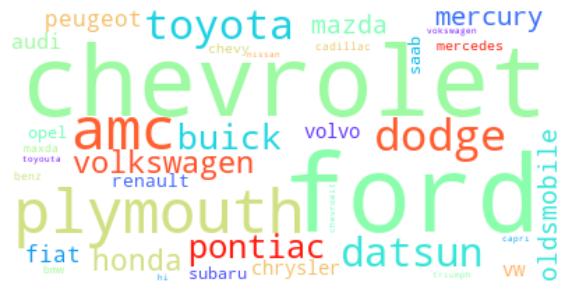

In [ ]:
word_cloud = WordCloud(collocations = False, 
                       background_color = 'white', colormap = 'rainbow').generate(text)
plt.figure(figsize = (10,6))
plt.axis('off')
plt.imshow(word_cloud, interpolation = 'bilinear')

## 도넛 그래프

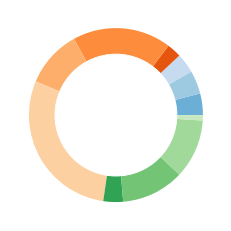

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

cmap = plt.get_cmap('tab20c')
outer_colors = cmap(np.arange(1,12))
donut = [12,13,11,8,55,32,87,11,35,33,3]
plt.pie(donut, radius = 1.0, colors = outer_colors)

incir = plt.Circle((0,0),0.7, color = 'white')
p = plt.gcf() # 주석 추가
p.gca().add_artist(incir)

plt.show()


## Box Plot

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


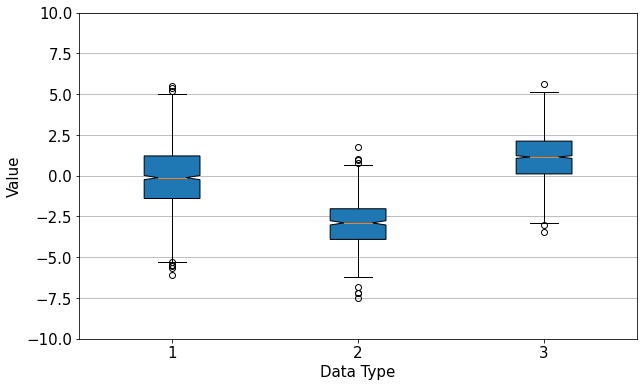

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize']= (10,6)
plt.rcParams['font.size'] = 15

np.random.seed(0)
data_a = np.random.normal(0, 2.0, 1000) # 정규분포
data_b = np.random.normal(-3.0, 1.5, 500)
data_c  = np.random.normal(1.2, 1.5, 1500)

fig, ax = plt.subplots()

bp = ax.boxplot([data_a, data_b, data_c],
               notch = True, 
               patch_artist = True, 
               )
ax.set_ylim(-10.0, 10.0)
ax.set_xlabel('Data Type')
ax.set_ylabel('Value')

plt.grid(color = 'grey', linestyle = '-', linewidth = .5, axis = 'y' )
plt.show()

## Tree Map

In [ ]:
! pip install squarify

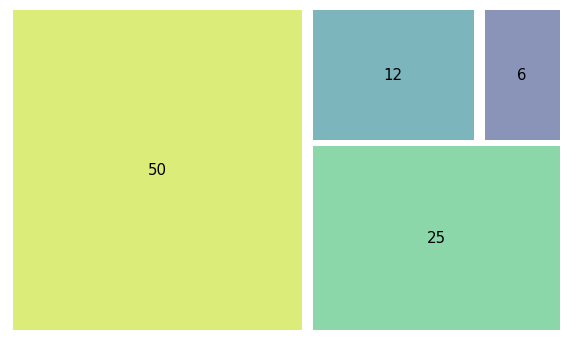

In [ ]:
import squarify as s

sizes = [50,25,12,6] # 꼭 100을 채우진 않아도 된다. 

label = [sizes[i] for i in range(len(sizes))]

s.plot(sizes, # 데이터
       label = label, # 데이터 라벨
       alpha = 0.6, # 투명도
       pad = True # 그래프간 간격
       )
plt.axis('off')
plt.show()

## 네트워크 다이어그램


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
df = pd.DataFrame({'from':['D', 'A','B','E','A','E','F'],
                   'to':['A','D','D','C','C','A','D']})
df

,from,to
0,D,A
1,A,D
2,B,D
3,E,C
4,A,C
5,E,A
6,F,D


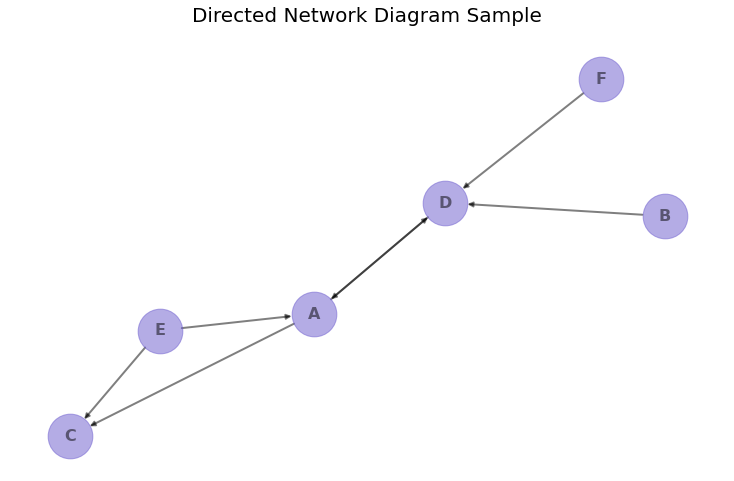

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


df = pd.DataFrame({'from':['D','A','B','E','A','E','F'],
                   'to':['A','D','D','C','C','A','D']})

np.random.seed(10)
G = nx.from_pandas_edgelist(df, 'from', 'to', create_using = nx.DiGraph())

nx.draw(G, with_labels = True, 
        node_size = 2000, 
        node_color = 'slateblue',
        alpha = 0.5, 
        width = 2,
        arrows = True,
        font_size = 16,
        font_weight = 'bold',
        )
plt.title('Directed Network Diagram Sample', size = 20, pad = 20)
plt.savefig('dnds', transparent = True)


plt.show()

## 3차원 산점도 

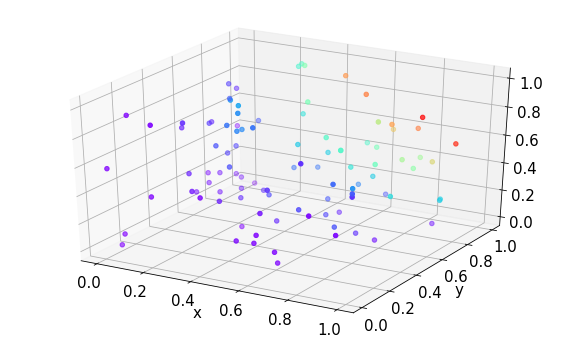

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

xdata = np.random.rand(100)
ydata = np.random.rand(100)
zdata = np.random.rand(100)

ax = plt.axes(projection = '3d')
ax.scatter(xdata, ydata, zdata, c = zdata * ydata * xdata, cmap = 'rainbow')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Sankey Diagram

In [ ]:
source = [0,0,
          1,1,
          2,2]
target = [1,2,
          3,4,
          5,6]
value = [8.4, 3.0,
         5.2, 3.2,
         2.3, 0.7]
label = ['America App store spent',
         'iPhone',
         'iPad',
         'Phone Games',
         'Phone Apps',
         'Pad Games',
         'Pad Apps']

In [ ]:
import plotly.graph_objects as go

link = dict(source = source, 
            target = target,
            value = value )
node = dict(label = label)

data = go.Sankey(link = link, node = node)

go.Figure(data)

## 버블맵

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
import plotly.express as px

px.scatter_mapbox(df, lat = 'latitude', lon = 'longitude',
                  size = 'population',
                  size_max = 10,
                  mapbox_style = 'open-street-map',
                  )